<a href="https://colab.research.google.com/github/cfoli/AI-4-Financial-Modeling/blob/main/House_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Let's begin by importing several packages we are likely to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# We will also be using several SKLearn packages specific to building ML pipelines, as well as those used in
# generating and fitting our models. We will import them here, too.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [4]:
# Read in our dataset(s), 'train' and 'test'; I have uploaded my datasets to my current session,
# so the filepath used to read in my data will reflect this

train = pd.read_csv('/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 2/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 2/test.csv')

# Quick print statement which prints the shape of each DF
print('\n', 'Train dataset shape:', train.shape[0],'x', train.shape[1],'\n'
      'Test dataset shape:', test.shape[0],'x', test.shape[1])


 Train dataset shape: 1460 x 81 
Test dataset shape: 1459 x 80


In [ ]:
# Let's look at the head and tail of training dataset
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
# It is difficult to view all of the columns in the DF format; we can call on the attribute
# 'columns' for the DF in order to get a list of the columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# We use the .info() method to get more information on the types of data and prevalence
# of missing - or null - records in each feature
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
## YOUR EDA BEGINS HERE!!! ##
## Generate as many new code cells as needed, below, to undertake your EDA ##
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


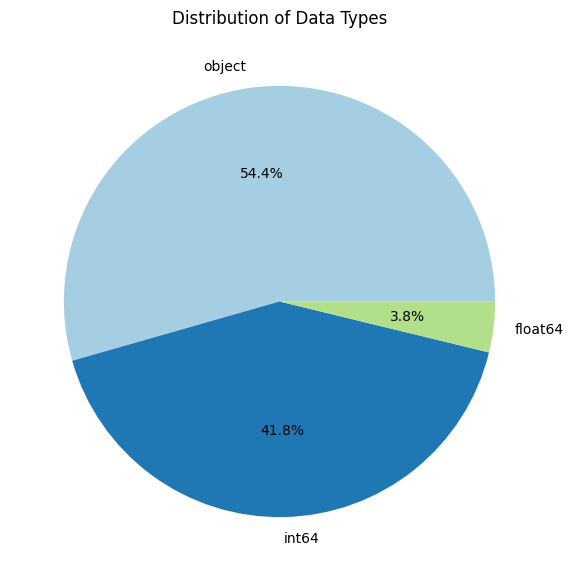

In [20]:
import matplotlib.pyplot as plt
dtype_counts = train.drop(columns=['Id','SalePrice']).dtypes.value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(dtype_counts, labels=dtype_counts.index.astype(str), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Data Types')
plt.show()


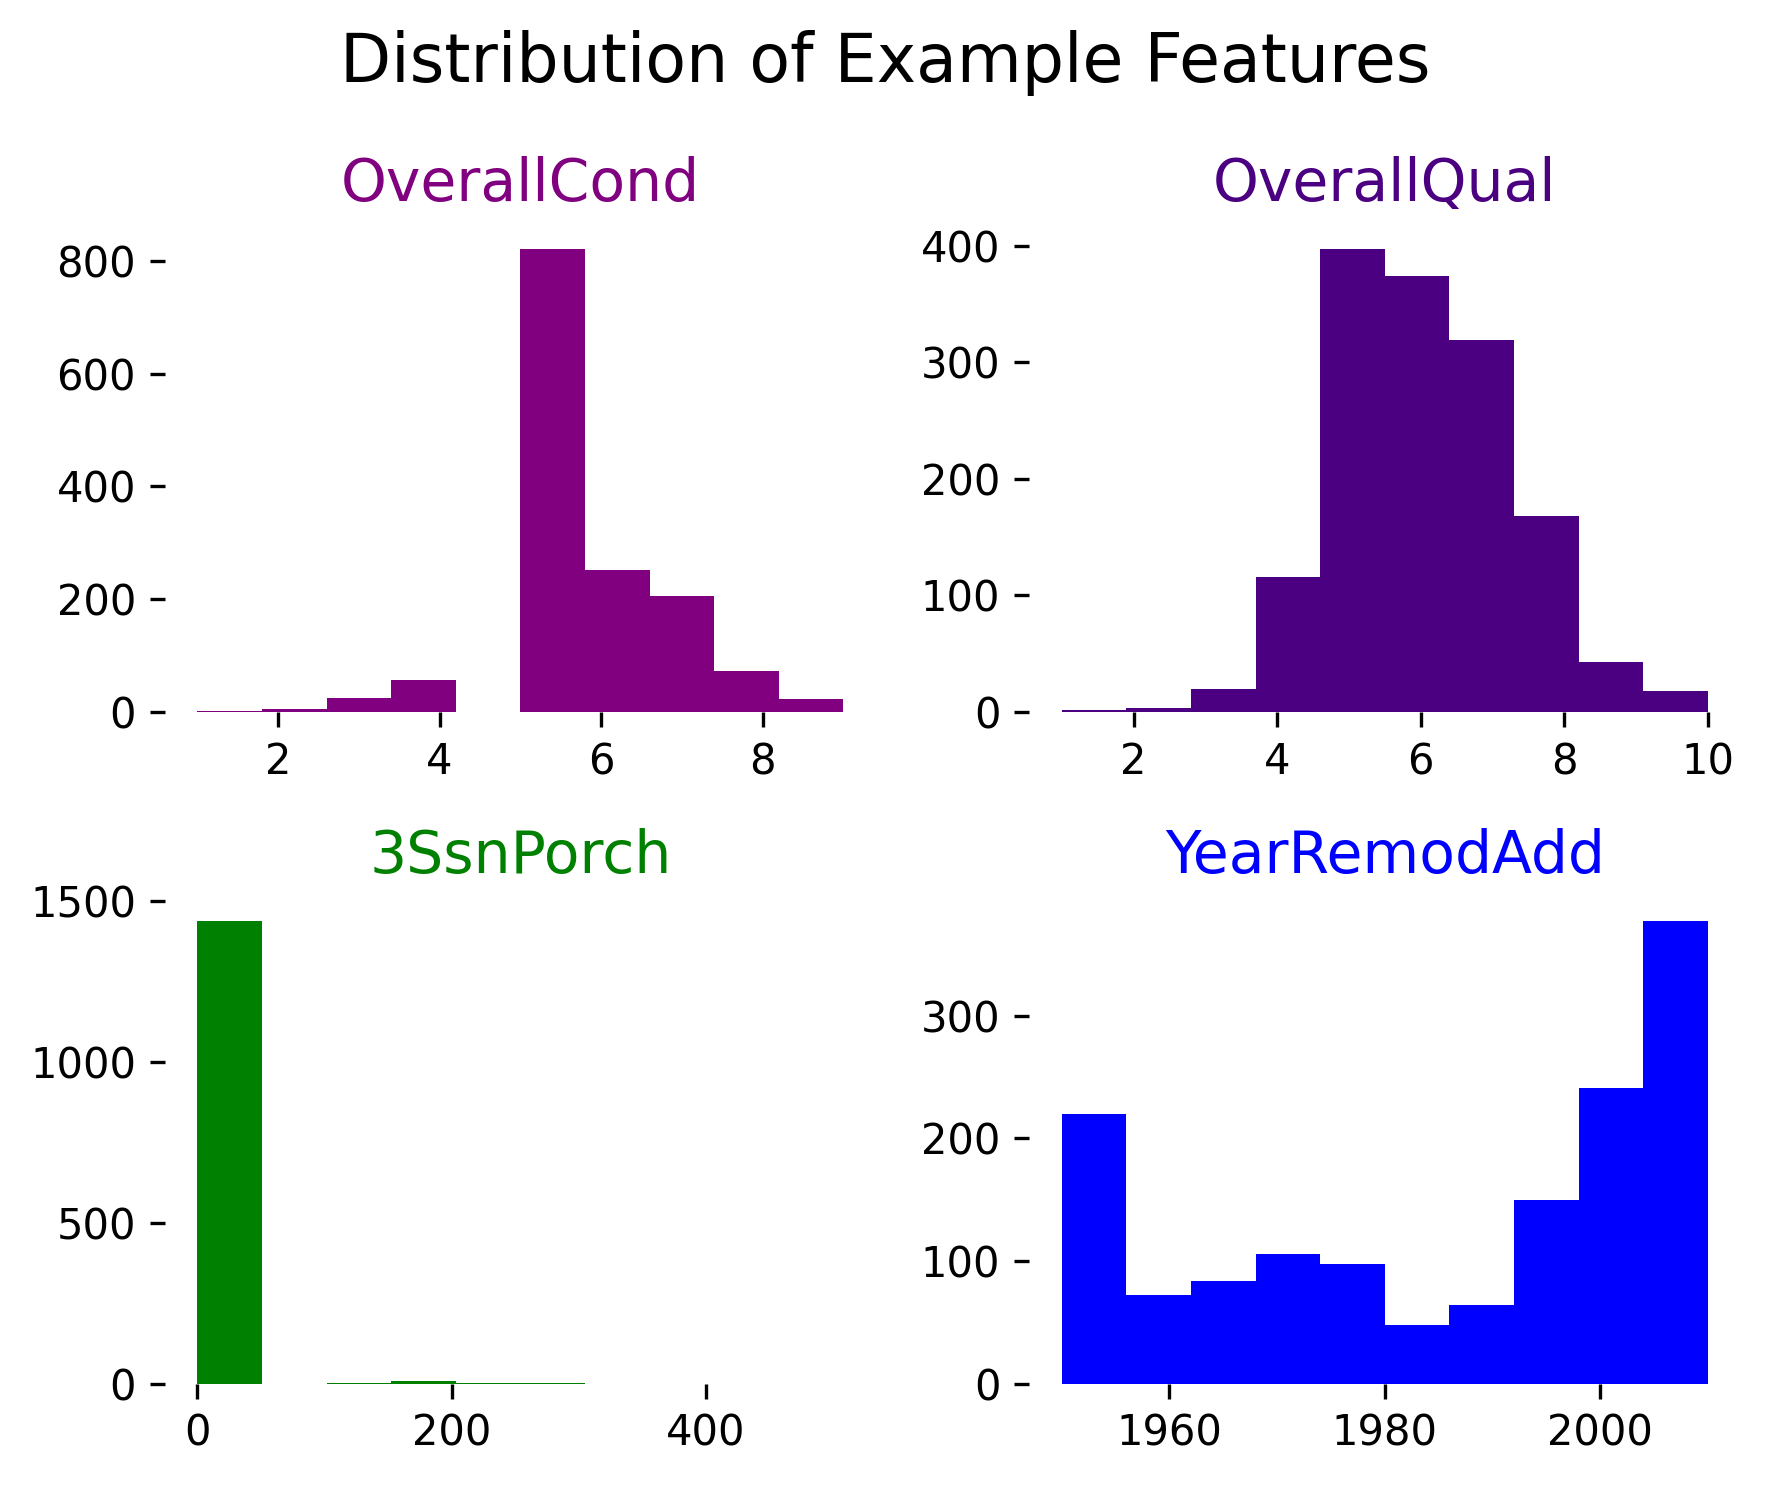

In [ ]:
features_to_plot = ['OverallCond','OverallQual','3SsnPorch','YearRemodAdd'] # LotFrontage
ax_colors = ['purple','indigo','green','blue']
fig,axes  = plt.subplots(2,2,figsize=(6,5),dpi=300)
axes = axes.flatten()

for idx,ax in enumerate(axes):
  train[features_to_plot[idx]].hist(ax=ax,bins=10,grid=False,color=ax_colors[idx])
  ax.set_title(features_to_plot[idx], fontsize=14,c=ax_colors[idx])
  ax.spines[:].set_visible(False)

plt.suptitle('Distribution of Example Features',fontsize=16)
plt.tight_layout()
plt.show()


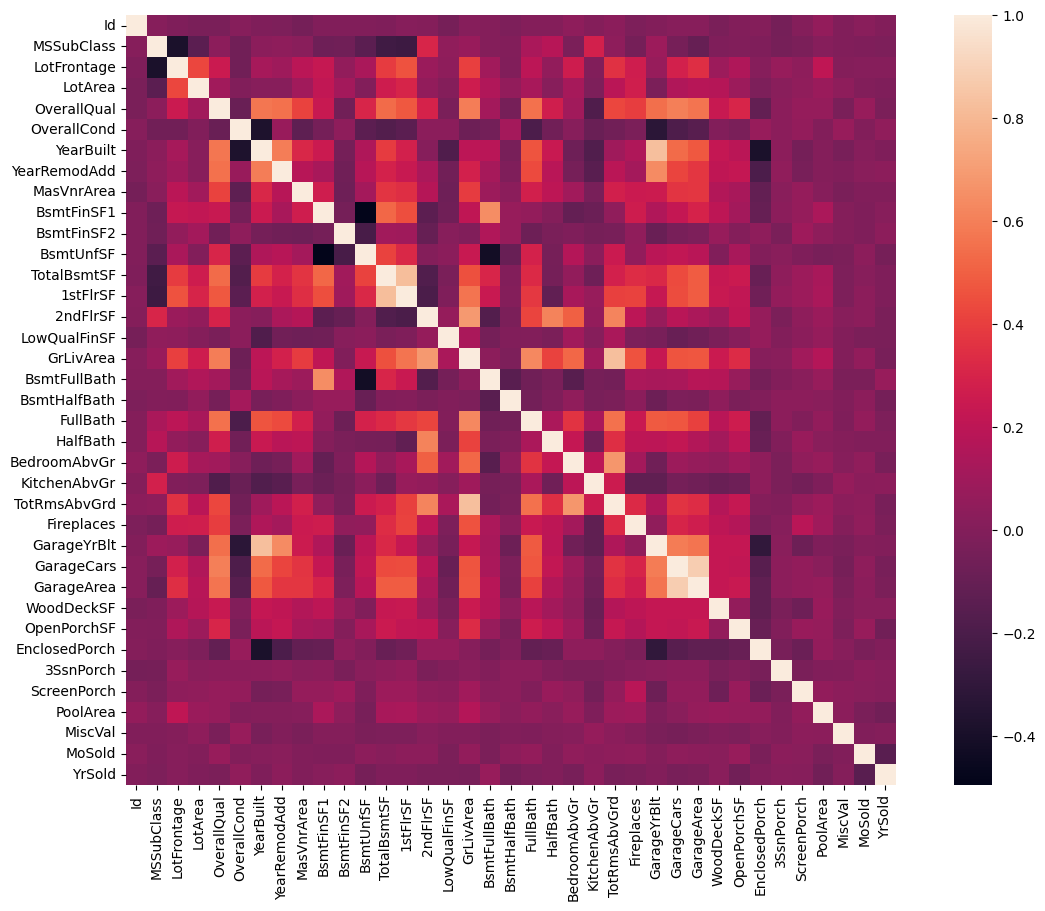

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))
corr_mat = train.drop(columns=['SalePrice']).corr(numeric_only=True)
sns.heatmap(corr_mat,square=True)
plt.show()

corr_thresh = 0.5
#corr_mat[abs(corr_mat) > corr_thresh]

In [ ]:
# Get pairs of features that have correlation above the threshold
high_corr_pairs = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > corr_thresh:
            high_corr_pairs.append((corr_mat.columns[i], corr_mat.columns[j], corr_mat.iloc[i, j]))

# Convert to a DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values('Correlation', ascending=False)
print(high_corr_df)


       Feature 1     Feature 2  Correlation
27    GarageArea    GarageCars     0.882475
20   GarageYrBlt     YearBuilt     0.825667
16  TotRmsAbvGrd     GrLivArea     0.825489
5       1stFlrSF   TotalBsmtSF     0.819530
8      GrLivArea      2ndFlrSF     0.687501
18  TotRmsAbvGrd  BedroomAbvGr     0.676620
9   BsmtFullBath    BsmtFinSF1     0.649212
21   GarageYrBlt  YearRemodAdd     0.642277
11      FullBath     GrLivArea     0.630012
15  TotRmsAbvGrd      2ndFlrSF     0.616423
12      HalfBath      2ndFlrSF     0.609707
22    GarageCars   OverallQual     0.600671
6      GrLivArea   OverallQual     0.593007
2   YearRemodAdd     YearBuilt     0.592855
24    GarageCars   GarageYrBlt     0.588920
0      YearBuilt   OverallQual     0.572323
7      GrLivArea      1stFlrSF     0.566024
26    GarageArea   GarageYrBlt     0.564567
25    GarageArea   OverallQual     0.562022
17  TotRmsAbvGrd      FullBath     0.554784
1   YearRemodAdd   OverallQual     0.550684
10      FullBath   OverallQual  

# Advanced Regression (Ridge & Lasso)

---



In [21]:
# Specify Linear Model to use
model_name = "Ridge" # Ridge, Lasso


In [22]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.feature_selection import SelectFromModel

# Copy training data to work with
train_df = train.copy(deep=True)
y = train_df['SalePrice']

# Drop 'ID' & 'SalePrice' columns
train_df.drop(columns=['Id','SalePrice'], inplace=True)

# Drop columns with too many NaNs (i.e more than 50% of column entries missing)
nan_threshold = 0.5
train_df.dropna(axis=1, thresh=int(nan_threshold * train_df.shape[0]),inplace=True)
# inplace=True ensures the dataset actually updates.
# axis=1 drops any column which with more than 'threshold' of its entries missing

# nan_percentage = train_df.isna().mean()  # Calculate percentage of NaNs in each column
# cols_to_drop = nan_percentage[nan_percentage > threshold].index  # Identify columns exceeding threshold

# ---------------------------------- Identify & Group Feature Types --------------------------------------

# Identify numerical and categorical features
numeric_feature_names = train_df.select_dtypes(include=[np.number]).columns.tolist()

cat_ord_feature_names = train_df.select_dtypes(include=["object"]).columns.tolist()

# Extract high-cardinality categorical features (categorical features with >10 unique categories)
cat_ord_feature_names_HCCF = [feature_name for feature_name in cat_ord_feature_names if train_df[feature_name].nunique() > 10]

# Extract low-cardinality categorical features (categorical features with >10 unique categories)
cat_ord_feature_names_LCCF = [feature_name for feature_name in cat_ord_feature_names if feature_name not in cat_ord_feature_names_HCCF]

# --------------------------------------- Feature Engineering -------------------------------------------

# train_df["TotalSF"]    = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
# train_df["HouseAge"]   = train_df["YrSold"] - train_df["YearBuilt"]
# train_df["RemodelAge"] = train_df["YrSold"] - train_df["YearRemodAdd"]
# numeric_feature_names.extend(["TotalSF", "HouseAge", "RemodelAge"])
# all_feature_names = numeric_feature_names + cat_ord_feature_names

# def engineer_novel_features(df):
#     """Create new engineered features for housing dataset."""
#     df = df.copy()
#     df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
#     df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
#     df["RemodelAge"] = df["YrSold"] - df["YearRemodAdd"]
#     return df
# feature_engineer = FunctionTransformer(engineer_novel_features)

# -------------------------- Define Feature/Column Transformation Pipelines -----------------------------

num_pipeline = Pipeline(
    steps = [('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())]
)

cat_pipeline_lccf = Pipeline(
    steps = [('cat_imputer', SimpleImputer(strategy='most_frequent')),
             ("encoder", OneHotEncoder(handle_unknown="ignore",sparse_output=False))]
)

cat_pipeline_hccf = Pipeline(
    steps = [('cat_imputer', SimpleImputer(strategy='most_frequent')),
             ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))]
    # OrdinalEncoder: Encode categorical features as an integer array. This results in a single column of integers (0 to n_categories - 1) per feature.
)

# -------------------------- Link Pipelines Together with ColumnTransformer -----------------------------

# ColumnTransformer is useful when you need to apply different transformations to different columns in a dataset, such as one-hot encoding for categorical features and scaling for numerical features.
preprocessor = ColumnTransformer(
    transformers=[
        # ('feature_engineer', feature_engineer, numeric_feature_names + cat_ord_feature_names),
        ('num_pipeline', num_pipeline, numeric_feature_names),
        ('cat_pipeline_lccf', cat_pipeline_lccf, cat_ord_feature_names_LCCF),
        ('cat_pipeline_hccf', cat_pipeline_hccf, cat_ord_feature_names_HCCF) # input order: ('name', transformer, columns)
    ]
)

# -------------------------- Train & Evaluate Model -----------------------------

X = train_df.copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of alpha values (log-spaced)
alpha_values = np.logspace(-4, 4, 20) # 50 values from 10^-4 to 10^4

# Store performance metrics
performance_metrics = []

for i,alpha in enumerate(alpha_values):
    print(f"Training model with alpha = {alpha} ({i+1} of {alpha_values.size})")

    # ----- Define Full Model Pipeline -----
    linear_model = None
    if model_name == "Ridge":
        linear_model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=alpha, max_iter=10000))])
    elif model_name == "Lasso":
        linear_model = Pipeline([
            ('preprocessor', preprocessor),
            ('model', Lasso(alpha=alpha, max_iter=10000, warm_start = True)) # ,warm_start = True
            # warm_start: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. This is useful if you want to train a large number of models quickly
        ])

    # Cross-validate model with -RMSE (NB: does never trains on the entire data set)...This step serves only to provide an unbiased estimate of model performance
    CV_rmse_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
    CV_rmse_scores = -CV_rmse_scores # convert -RMSE to positive values

    # Fit model on entire data
    linear_model.fit(X_train, y_train)

    # --------------- Evaluate model performance ----------------
    # Predict
    y_pred_train = linear_model.predict(X_train)
    y_pred_test  = linear_model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse  = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2   = r2_score(y_train, y_pred_train)
    test_r2    = r2_score(y_test, y_pred_test)

    # Store results
    performance_metrics.append({
        "alpha": alpha,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "CV_rmse": CV_rmse_scores.mean()
    })

# Convert to DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics)

optimal_alpha_outputs = performance_df.loc[performance_df['test_rmse'].idxmin()]

from IPython.display import clear_output
clear_output()

print(f"Optimal alpha: {optimal_alpha_outputs['alpha']:.4f}\n")
print(f"----------- PERFORMANCE METRICS: TRAINING SET ({model_name}) ---------------")
print(f"Train RMSE: {optimal_alpha_outputs['train_rmse']:.4f}")
print(f"Train R²: {optimal_alpha_outputs['train_r2']:.4f}")

print(f"----------- PERFORMANCE METRICS: TEST SET ({model_name}) ---------------")
print(f"Test RMSE: {optimal_alpha_outputs['test_rmse']:.4f}")
print(f"Test R²: {optimal_alpha_outputs['test_r2']:.4f}")


Optimal alpha: 0.0886

----------- PERFORMANCE METRICS: TRAINING SET (Ridge) ---------------
Train RMSE: 22046.6177
Train R²: 0.9185
----------- PERFORMANCE METRICS: TEST SET (Ridge) ---------------
Test RMSE: 30152.9817
Test R²: 0.8815


# Plot Model Performance as a Function of Alpha

---



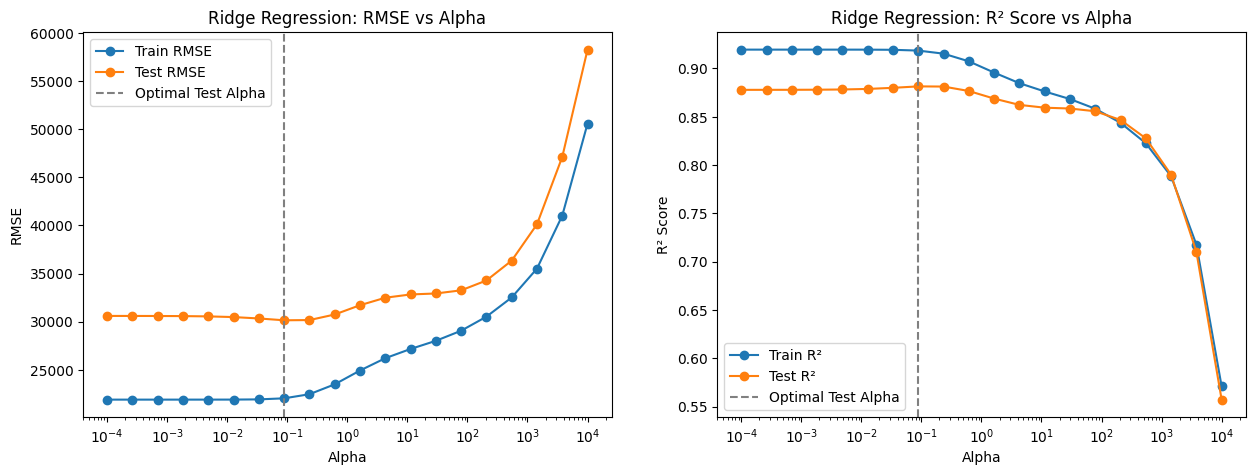

In [23]:

# Plot RMSE
fig,axes = plt.subplots(1,2,figsize=(15, 5))
axes[0].plot(performance_df["alpha"], performance_df["train_rmse"], label="Train RMSE", marker="o")
axes[0].plot(performance_df["alpha"], performance_df["test_rmse"], label="Test RMSE", marker="o")
axes[0].axvline(x=optimal_alpha_outputs['alpha'], color='gray', linestyle='--', label='Optimal Test Alpha')
axes[0].set_xscale("log") # Change xscale to set_xscale
axes[0].set_xlabel("Alpha") # Change xlabel to set_xlabel
axes[0].set_ylabel("RMSE") # Change ylabel to set_ylabel
axes[0].set_title(f"{model_name} Regression: RMSE vs Alpha")
axes[0].legend()
axes[0].grid(False)
# axes[0].spines[:].set_visible(False)

# Plot R²
axes[1].plot(performance_df["alpha"], performance_df["train_r2"], label="Train R²", marker="o")
axes[1].plot(performance_df["alpha"], performance_df["test_r2"], label="Test R²", marker="o")
axes[1].axvline(x=optimal_alpha_outputs['alpha'], color='gray', linestyle='--', label='Optimal Test Alpha')
axes[1].set_xscale("log") # Change xscale to set_xscale
axes[1].set_xlabel("Alpha") # Change xlabel to set_xlabel
axes[1].set_ylabel("R² Score") # Change ylabel to set_ylabel
axes[1].set_title(f"{model_name} Regression: R² Score vs Alpha")
axes[1].legend()
axes[1].grid(False)
plt.show() # Added plt.show() to display the plot


# Fit Model Based Using Optimal Alpha and Perform Feature Selection

---



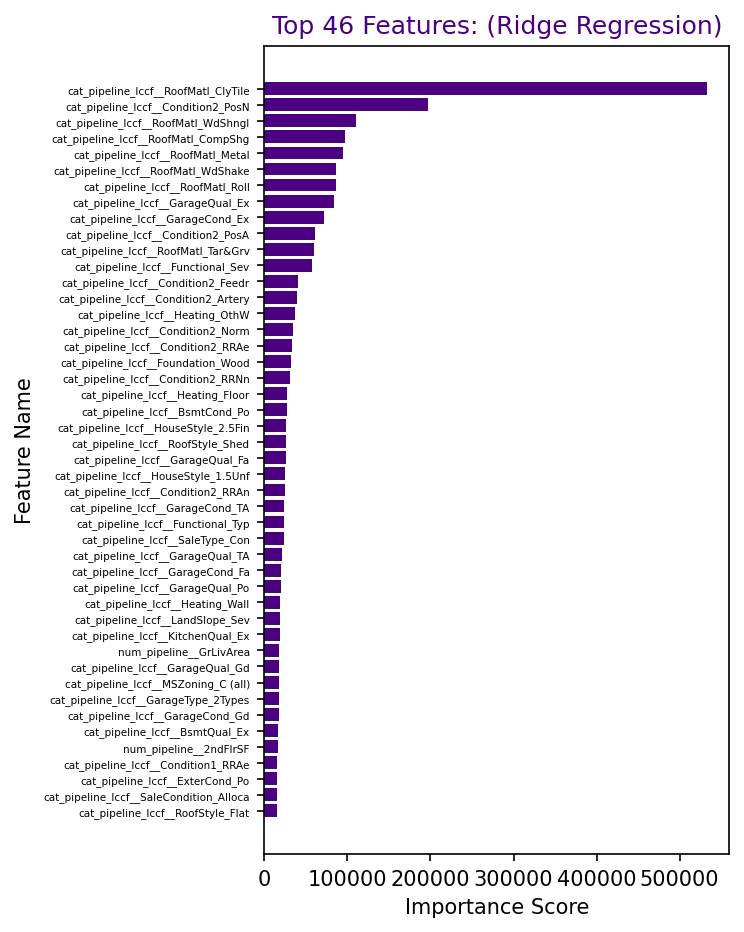

In [24]:
from sklearn.feature_selection import SelectFromModel

# Apply preprocessing
X_transformed = preprocessor.fit_transform(X_train)

# Apply feature selection
model_ = Lasso(max_iter=10000, alpha=optimal_alpha_outputs['alpha']) if model_name == "Lasso" else Ridge(max_iter=10000, alpha=optimal_alpha_outputs['alpha'])

feature_selector = SelectFromModel(model_, threshold='mean')
feature_selector.fit(X_transformed, y_train)

# Get feature importance scores from the fitted model
feature_importance = np.abs(feature_selector.estimator_.coef_[feature_selector.get_support()])

selected_features  = np.array(preprocessor.get_feature_names_out())[feature_selector.get_support()]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": selected_features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(4, 7),dpi=150)
plt.barh(importance_df["Feature"], importance_df["Importance"], color='indigo')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.yticks(fontsize=5)
plt.title(f"Top {importance_df.shape[0]} Features: ({model_name} Regression)",c='indigo')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()


In [ ]:
preprocessor.fit_transform(X_train).shape

(1168, 235)

In [18]:
# Generate Predictions on Held-out Test Set
train = pd.read_csv('/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 2/train.csv')
test  = pd.read_csv('/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 2/test.csv')

# ----------------------
train_df = train.copy(deep=True)
y_train = train_df['SalePrice']

# Drop 'ID' & 'SalePrice' columns
train_df.drop(columns=['Id','SalePrice'], inplace=True)

# Drop columns with too many NaNs (i.e more than 50% of column entries missing)
nan_threshold = 0.5
nan_percentage = train_df.isna().mean()  # Calculate percentage of NaNs in each column
cols_to_drop = nan_percentage[nan_percentage > nan_threshold].index  # Identify columns exceeding threshold
train_df.drop(columns=cols_to_drop, inplace=True)

X_train = train_df.copy(deep=True)

# ---------------------
# Copy training data to work with
test_df = test.copy(deep=True)

# Drop 'ID' & 'SalePrice' columns
test_df.drop(columns=['Id'], inplace=True)

test_df.drop(columns=cols_to_drop, inplace=True)
X_test = test_df.copy(deep=True)

# ---------------------
# lasso_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', Lasso(alpha=optimal_alpha_outputs['alpha'], max_iter=10000, warm_start = True))
# ])
linear_model = None
if model_name == "Ridge":
    linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=optimal_alpha_outputs['alpha'], max_iter=10000))])
elif model_name == "Lasso":
    linear_model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', Lasso(alpha=optimal_alpha_outputs['alpha'], max_iter=10000, warm_start = True)) # ,warm_start = True
        # warm_start: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. This is useful if you want to train a large number of models quickly
    ])

# Fit model on entire data
linear_model.fit(X_train, y_train)

# Predict on both training and held out sets
y_pred_train = linear_model.predict(X_train)
y_pred_test  = linear_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2   = r2_score(y_train, y_pred_train)

print(f"Optimal alpha: {optimal_alpha_outputs['alpha']:.4f}\n")
print(f"----------- FINAL TRAINING PERFORMANCE METRICS ({model_name}) ---------------")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

# ------------------------------
model_pred = pd.DataFrame()
model_pred['Id'] = test['Id']
model_pred['SalePrice'] = y_pred_test
model_pred.to_csv(f'/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 2/optimized_{model_name}_pred.csv', index=False)


Optimal alpha: 4.2813

----------- FINAL TRAINING PERFORMANCE METRICS (Lasso) ---------------
Train RMSE: 22998.7334
Train R²: 0.9161


In [17]:
f'optimized_{model_name}_pred'

'optimized_Lasso_pred'